# Lending Club Case Study

## 1. Data Understanding
1. Problem Statement
2. Objectives
3. Understanding the Dataset
4. Dataset Attributes
5. Dataset Row Analysis
6. Dataset Column Analysis
7. Handling Missing Data
8. Handling Outliers

### 1.1 Problem Statement

Lending Club is a company specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company 

The data given in the CSV contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. 

When a person applies for a loan, there are two types of decisions that could be taken by the company:

    Loan accepted: 
        If the company approves the loan, there are 3 possible scenarios described below:

        1. Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

        2. Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

        3. Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

    Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

### 1.2 Business Objective
    Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.      

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case s.    

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

### 1.3 Understanding the Dataset
The Dataset provided contains the complete details of previous loan applicants and the status of payment of their EMIs.
This dataset also contains the basic financial details like Annual Income, Grade and Sub Grade and most importantly DTI - Debt To Incomeent. 

In [128]:
# import all the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [129]:
# Reading data into a DataFrame from the loan.csv using pandas
lending_df = pd.read_csv('loan.csv')
lending_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [130]:
lending_df.shape

(39717, 111)

No.of Rows in the DataFrame = 39717

No. of Columns in the DataFrame = 111

In [132]:
# Sorting the Columns to understand if there are any columns with null values
# This is done using isna() method
lending_df.isna().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

In [133]:
#Storing the no.of Rows and Columns into variables for further usage
total_rows = lending_df.shape[0]
total_cols = lending_df.shape[1]

In [134]:
## To find what percentage of columns are completely empty
empty_columns = 0

for colum in sorted(lending_df.columns):
    if lending_df[colum].isna().sum() == total_rows:
        empty_columns = empty_columns+1;
print ("Number of Empty columns " ,empty_columns)
print ("Percentage of empty columns " , round((empty_columns / total_cols) * 100 , 2))

Number of Empty columns  54
Percentage of empty columns  48.65


Number of Empty columns  54

Percentage of empty columns  48.65

In [136]:
# Dropping the empty columns
lending_df.dropna(how='all',axis=1,inplace=True)
lending_df.shape

(39717, 57)

In [137]:
# Removing Unique Values as they are not going to help us in our Analysis

cols_tobe_removed = []

for i in lending_df.columns:
    if lending_df[i].nunique() == 1:
        cols_tobe_removed.append(i)

lending_df.drop(cols_tobe_removed, axis=1, inplace=True)


In [138]:
lending_df.shape

(39717, 48)

In [139]:
# Duplicate check - Checking if there are any duplicate rows in the DataFrame
lending_df[lending_df.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies


In [140]:
lending_df['loan_status'].info

<bound method Series.info of 0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
4            Current
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 39717, dtype: object>

### Dropping Records

In [142]:
# Dropping the rows with loan_status value as 'Current'. These values are not going to help our analysis as we does not fall into 'Defaulters' category
lending_df = lending_df[lending_df['loan_status'].str.lower() != 'current']
# lending_df.info()
lending_df.shape

(38577, 48)

In [143]:
# Dropping the columns where the missing values is more than 65%
for col in lending_df.columns:
    missing_vals = round(lending_df[col].isna().sum()/lending_df.shape[0], 2)
    if missing_vals >= 0.65:
        lending_df.drop(col, axis = 1, inplace = True)
        print(col) #Printing the column names

lending_df.shape
lending_df.info()

mths_since_last_delinq
mths_since_last_record
next_pymnt_d
<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38577 non-null  int64  
 1   member_id                38577 non-null  int64  
 2   loan_amnt                38577 non-null  int64  
 3   funded_amnt              38577 non-null  int64  
 4   funded_amnt_inv          38577 non-null  float64
 5   term                     38577 non-null  object 
 6   int_rate                 38577 non-null  object 
 7   installment              38577 non-null  float64
 8   grade                    38577 non-null  object 
 9   sub_grade                38577 non-null  object 
 10  emp_title                36191 non-null  object 
 11  emp_length               37544 non-null  object 
 12  home_ownership           38577 non-null  object 
 13  annual_inc            

In [144]:
# Dropping columns that have description and other non-useful columns. 
# Below Columns are very generic and do not help us in our analysis

cols_tobe_dropped = [
 'collection_recovery_fee',
 'delinq_2yrs',
 'desc',
 'earliest_cr_line',
 'emp_title',
 'id',
 'inq_last_6mths',
 'last_credit_pull_d',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'member_id',
 'open_acc',
 'out_prncp',
 'out_prncp_inv',
 'pub_rec',
 'recoveries',
 'revol_bal',
 'revol_util',
 'title',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_late_fee',
 'total_rec_prncp',
 'url' 
]

lending_df.drop(cols_tobe_dropped, axis=1, inplace=True)

In [145]:
lending_df.shape

(38577, 19)

In [146]:
lending_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  object 
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  zip_code              38

## Data Conversion

In [148]:
# dti, loan_amnt, funded_amnt, funded_amnt_inv - These columns have non-uniform types.
# To make them uniform, we can convert all of them to float 
# to do this, we can use astype function in pandas

lending_df = lending_df.astype(
    {'dti' : 'float',
    'loan_amnt' : 'float',
    'funded_amnt' : 'float',
    'funded_amnt_inv' : 'float'}
)

In [149]:
lending_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  float64
 1   funded_amnt           38577 non-null  float64
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  object 
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  zip_code              38

In [150]:
lending_df.head

<bound method NDFrame.head of        loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0         5000.0       5000.0           4975.0   36 months   10.65%   
1         2500.0       2500.0           2500.0   60 months   15.27%   
2         2400.0       2400.0           2400.0   36 months   15.96%   
3        10000.0      10000.0          10000.0   36 months   13.49%   
5         5000.0       5000.0           5000.0   36 months    7.90%   
...          ...          ...              ...         ...      ...   
39712     2500.0       2500.0           1075.0   36 months    8.07%   
39713     8500.0       8500.0            875.0   36 months   10.28%   
39714     5000.0       5000.0           1325.0   36 months    8.07%   
39715     5000.0       5000.0            650.0   36 months    7.43%   
39716     7500.0       7500.0            800.0   36 months   13.75%   

       installment grade sub_grade emp_length home_ownership  annual_inc  \
0           162.87     B        B2  10+ y

In [151]:
# Interest rate column int_rate has % symbol in it. So, we can remove it and convert those values into float 
# to do this, we can use lambda function 

lending_df['int_rate'] = lending_df['int_rate'].apply(lambda x : float(x.replace('%','').strip()));

In [152]:
lending_df['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64

In [153]:
# in the similar way, we can see term colum having 'months' appended to the numerical value. 
# we can clean this by removing 'months' string and convert the values to int
lending_df['term'] = lending_df['term'].apply(lambda x : int(x.replace('months','').strip()))
lending_df['term']

0        36
1        60
2        36
3        36
5        36
         ..
39712    36
39713    36
39714    36
39715    36
39716    36
Name: term, Length: 38577, dtype: int64

In [154]:
lending_df.head

<bound method NDFrame.head of        loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0         5000.0       5000.0           4975.0    36     10.65       162.87   
1         2500.0       2500.0           2500.0    60     15.27        59.83   
2         2400.0       2400.0           2400.0    36     15.96        84.33   
3        10000.0      10000.0          10000.0    36     13.49       339.31   
5         5000.0       5000.0           5000.0    36      7.90       156.46   
...          ...          ...              ...   ...       ...          ...   
39712     2500.0       2500.0           1075.0    36      8.07        78.42   
39713     8500.0       8500.0            875.0    36     10.28       275.38   
39714     5000.0       5000.0           1325.0    36      8.07       156.84   
39715     5000.0       5000.0            650.0    36      7.43       155.38   
39716     7500.0       7500.0            800.0    36     13.75       255.43   

      grade sub_grade

In [155]:
# Round off the decimals to make them uniform - dti, loan_amnt, funded_amnt, funded_amnt_inv, int_rate

lending_df['dti'] = lending_df['dti'].apply(lambda x : round(x,2))
lending_df['loan_amnt'] = lending_df['loan_amnt'].apply(lambda x : round(x,2))
lending_df['funded_amnt'] = lending_df['funded_amnt'].apply(lambda x : round(x,2))
lending_df['funded_amnt_inv'] = lending_df['funded_amnt_inv'].apply(lambda x : round(x,2))
lending_df['int_rate'] = lending_df['int_rate'].apply(lambda x : round(x,2))

In [156]:
lending_df.head

<bound method NDFrame.head of        loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0         5000.0       5000.0           4975.0    36     10.65       162.87   
1         2500.0       2500.0           2500.0    60     15.27        59.83   
2         2400.0       2400.0           2400.0    36     15.96        84.33   
3        10000.0      10000.0          10000.0    36     13.49       339.31   
5         5000.0       5000.0           5000.0    36      7.90       156.46   
...          ...          ...              ...   ...       ...          ...   
39712     2500.0       2500.0           1075.0    36      8.07        78.42   
39713     8500.0       8500.0            875.0    36     10.28       275.38   
39714     5000.0       5000.0           1325.0    36      8.07       156.84   
39715     5000.0       5000.0            650.0    36      7.43       155.38   
39716     7500.0       7500.0            800.0    36     13.75       255.43   

      grade sub_grade

In [157]:
# we can also convert the issue_d column to DateTime type which helps us extracting Months, Weeks or any other 
# We can make use of to_datetime function from pandas library
lending_df['issue_d'] = pd.to_datetime(lending_df['issue_d'],format = '%b-%y')

In [158]:
lending_df['issue_d'] 

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

## Reusable Functions

In [160]:
''' This is a common method to plot the boxplot 
params:
    df : The target DataFrame on which the boxplot to be plotted
    col_name : column name on which the boxplot to be plotted
    title : optional param which specifies the title. Default is None
    horizontal : optional param specifies the orientation of the boxplot. Default is True

Returns: None
'''
def draw_boxplot(df : pd.DataFrame, col_name : str, title : str = None, horizontal: bool = True) -> None:
    if col_name not in df.columns:
        print(f"No column with name '{col_name}' is found")
        return

    plt.figure(figsize=(8,6))
    if horizontal : 
        sns.boxplot(y=df[col_name] ,orient = 'h', palette = 'Reds')
    else:
        sns.boxplot(x=df[col_name] ,orient = 'h', palette = 'Reds')


    if title:
        plt.title(title)

    plt.xlabel(col_name, fontsize = 12)
    plt.ylabel('Values', fontsize = 12)
    plt.show()

In [161]:

'''
Charged Off proportion - This derived attribute is the ration between number of charged_off customers to the total_customers (charged_off + Fully_Paid)
This attribute gives us the defaulters metrics
This is a reusable function which returns a DataSet which is grouped by given two columns
params: 
    group_by_col1 - Column attribute with which we want to do compare the trend of loan_status column
    group_by_col2 - We are going to use loan_status as a static colum 
returns: a DataSet with Chargedoff_Proportions values column
'''
def get_df_with_charged_off_proportion (group_by_col1, group_by_col2) -> pd.DataFrame :
    new_df_with_charged_off_ratio = lending_df.groupby([group_by_col1, group_by_col2]).loan_status.count().unstack().fillna(0).reset_index()
    new_df_with_charged_off_ratio['Total'] = new_df_with_charged_off_ratio['Charged Off']+ new_df_with_charged_off_ratio['Fully Paid']
    new_df_with_charged_off_ratio['Chargedoff_Proportion'] = new_df_with_charged_off_ratio['Charged Off'] / new_df_with_charged_off_ratio['Total']
    return new_df_with_charged_off_ratio.sort_values('Chargedoff_Proportion', ascending=False)

In [162]:
'''
 perform_bivariate_analysis_using_barplot() method is used to plot barplots for univariate analysis

 params: 
     df: DafaFrame 
     title : str - Title of the barplot
     bucket_col_name : Name of the column which is bucketed
     xlabel : label for x axis
     charged_off_col : Default - Chargedoff_Proportion 
     ylabel : lebel for y axis

 returns: None
'''
def perform_bivariate_analysis_using_barplot(df, title, bucket_col_name, xlabel,charged_off_col = 'Chargedoff_Proportion', ylabel = 'Chargedoff Proportion') -> None:
    fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
    ax1.set_title(title,fontsize=15,color = 'w')
    ax1=sns.barplot(x=bucket_col_name, y=charged_off_col, data=df, hue=bucket_col_name)
    ax1.set_ylabel(ylabel,fontsize=14,color = 'w')
    ax1.set_xlabel(xlabel,fontsize=14,color='w')
    plt.show()

## Handling Outliers

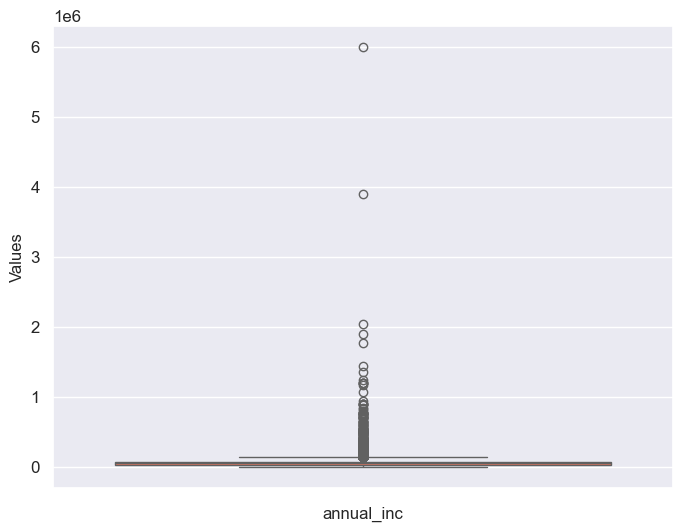

In [164]:
# Create box plots to view the outliers for annual_inc, loan_amnt, funded_amnt, funded_amnt_inv, int_rate, installments, dti

draw_boxplot(lending_df,'annual_inc')

In [165]:
lending_df['annual_inc'].sort_values(ascending=False)

30107    6000000.0
29639    3900000.0
39089    2039784.0
23551    1900000.0
7247     1782000.0
           ...    
26649       4800.0
37709       4200.0
30726       4200.0
29283       4080.0
35501       4000.0
Name: annual_inc, Length: 38577, dtype: float64

In [166]:
# reference : https://learn.upgrad.com/course/5810/segment/54646/325475/985548/4924171
# Finding the outliers and clearing them. Finding the lower bound and upper bound is helpful in removing the outliers
# To do this, We should find out Quartile1, Quartile 3 and IQR values 

quartile1 = lending_df['annual_inc'].quantile(0.25)
quartile3 = lending_df['annual_inc'].quantile(0.75)
iqr = quartile3 - quartile1
iqr

42000.0

In [167]:
# Calculating the lower bound and upper bound values
lower_bound = quartile1 - 1.5 * iqr
upper_bound = quartile1 + 1.5 * iqr

In [168]:
is_annual_inc_lt = lending_df.annual_inc > lower_bound
is_annual_inc_gt = lending_df.annual_inc < upper_bound

req_income = is_annual_inc_lt & is_annual_inc_gt

# Removing the outliers which are less than lower bound and greater than upper bound
lending_df = lending_df[req_income]

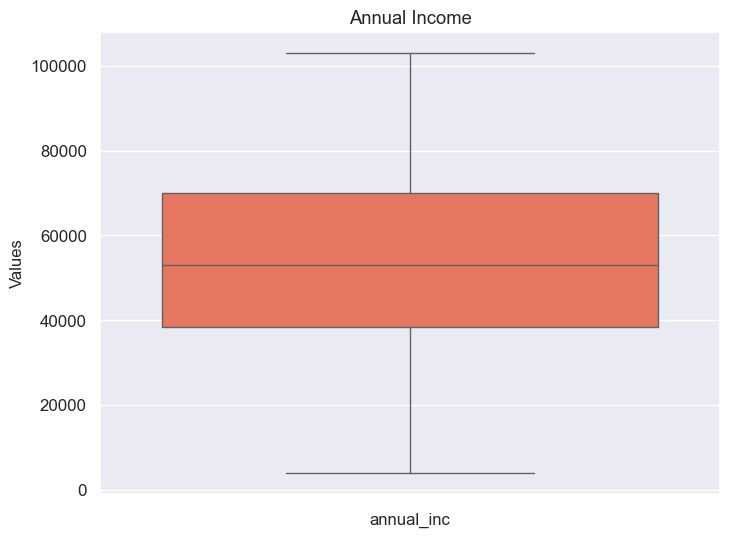

In [169]:
# Drawing boxplot for Annual Income
draw_boxplot(lending_df,'annual_inc', 'Annual Income')

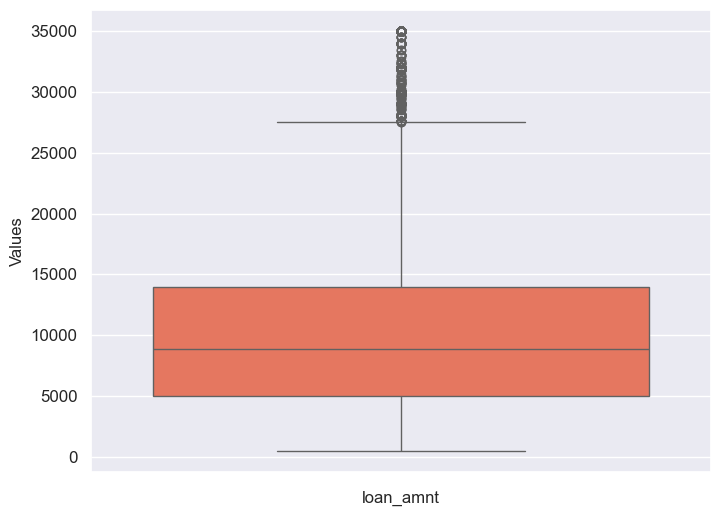

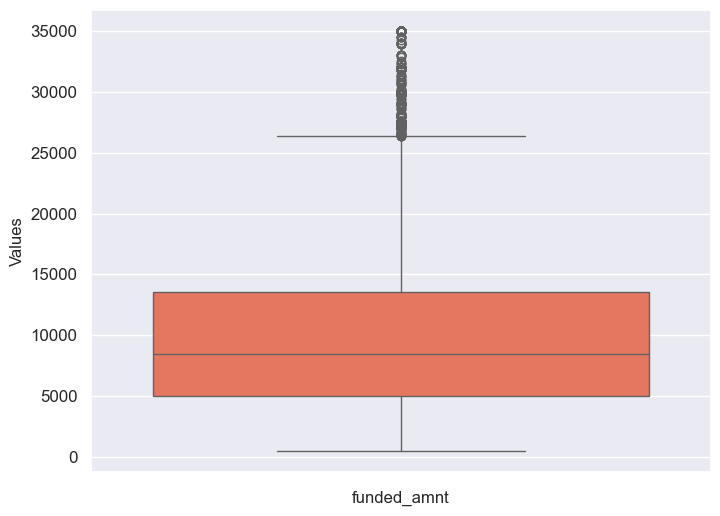

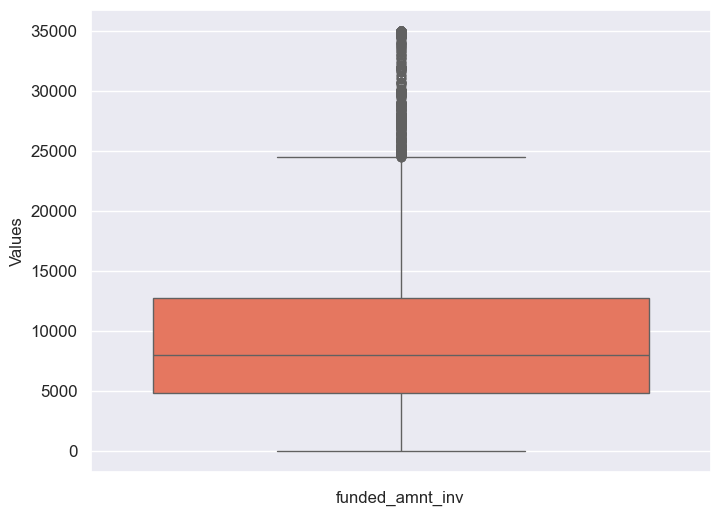

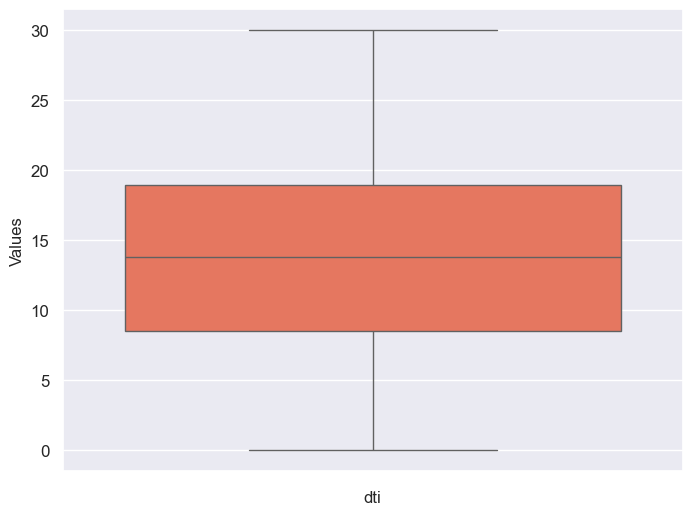

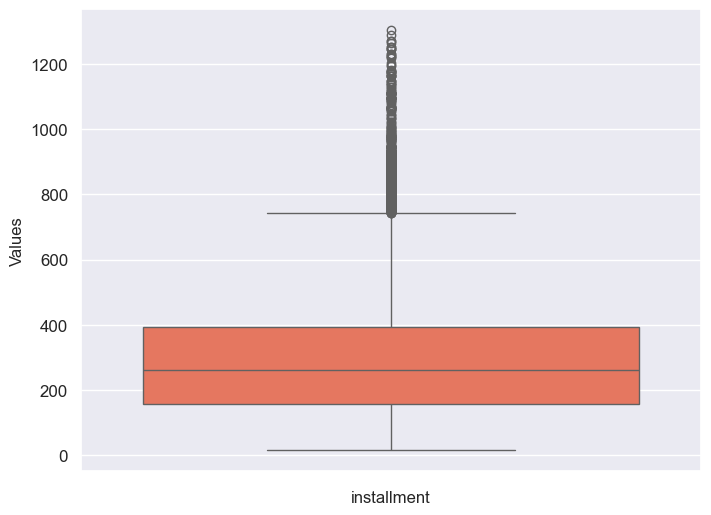

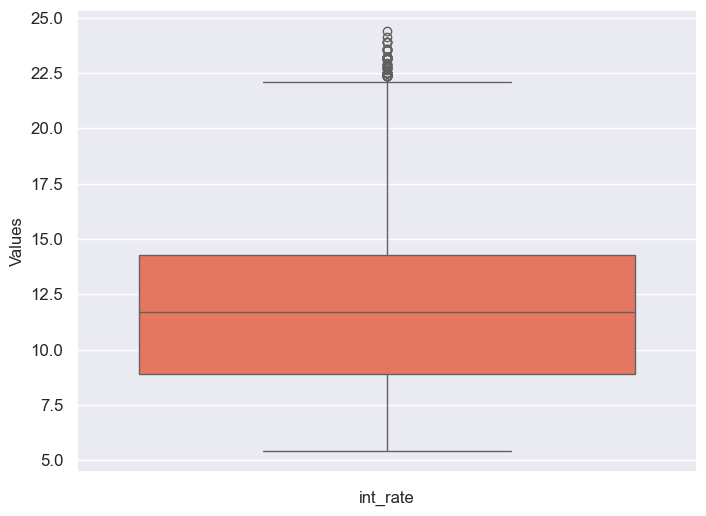

In [170]:
# Drawing boxplot for Loan amount, funded amount, funded_amnt_inv, DTI, installment and interest rate

for column in ['loan_amnt', 'funded_amnt','funded_amnt_inv','dti','installment','int_rate']:
    draw_boxplot(lending_df, column)

## Imputing Values

In [172]:
# Checking the null values in emp_length

lending_df.emp_length.isna().sum()

986

In [173]:
# Finding the average salary of those applicants whose emp_length is null
lending_df[lending_df.emp_length.isna()]['annual_inc'].describe()

count       986.000000
mean      40367.309371
std       20664.757246
min        4200.000000
25%       24000.000000
50%       36066.000000
75%       52971.000000
max      102672.000000
Name: annual_inc, dtype: float64

In [174]:
# Finding the most frequent annual_inc where emp_length is missing
lending_df[lending_df.emp_length.isna()]['annual_inc'].mode()

# Though the emp_length is missing, the annual_inc of these records are 36000, which is a decent income. 
# Hence, we can infer that, these applicants are self employed. 

0    36000.0
Name: annual_inc, dtype: float64

In [175]:
lending_df.emp_length.value_counts()

emp_length
10+ years    6821
< 1 year     4002
2 years      3822
3 years      3500
4 years      2938
1 year       2834
5 years      2801
6 years      1895
7 years      1500
8 years      1202
9 years      1031
Name: count, dtype: int64

In [176]:
# Mode of emp_length
lending_df.emp_length.mode()

0    10+ years
Name: emp_length, dtype: object

In [177]:
# We can fill all the null values with the mode() of emp_length which is 10+ years
lending_df.emp_length.fillna(lending_df.emp_length.mode()[0], inplace=True)

In [178]:
# Checking if the above imputing has worked well or not
lending_df.emp_length.isna().sum()

0

In [179]:
# Looking at the home_ownership column
lending_df.home_ownership.value_counts()

home_ownership
RENT        17182
MORTGAGE    13375
OWN          2686
OTHER          87
NONE            2
Name: count, dtype: int64

In [180]:
# There are two records with NONE for which we can club them with OTHER type.
lending_df['home_ownership'].replace('NONE','OTHER', inplace=True)
lending_df.home_ownership.value_counts()

home_ownership
RENT        17182
MORTGAGE    13375
OWN          2686
OTHER          89
Name: count, dtype: int64

In [181]:
# Looking at verification_status column 
lending_df.verification_status.value_counts()

verification_status
Not Verified       15274
Verified            9633
Source Verified     8425
Name: count, dtype: int64

In [182]:
# Verified and Source Verified categories can be combined as their meaning and purpose is same
lending_df.verification_status.replace('Source Verified', 'Verified', inplace=True);

In [183]:
lending_df.verification_status.value_counts()

verification_status
Verified        18058
Not Verified    15274
Name: count, dtype: int64

In [184]:
# Looking at the emp_length, We can still simplify the values 
lending_df.emp_length = lending_df.emp_length.map({'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3,
    '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7,
    '8 years': 8, '9 years': 9, '10+ years': 10})

In [185]:
lending_df.emp_length.value_counts()

emp_length
10    7807
0     4002
2     3822
3     3500
4     2938
1     2834
5     2801
6     1895
7     1500
8     1202
9     1031
Name: count, dtype: int64

In [186]:
# Looking at the pub_rec_bankruptcies records for imputing

lending_df.pub_rec_bankruptcies.value_counts()
lending_df.pub_rec_bankruptcies.isna().sum()

602

In [187]:
# Dropping off these records 
lending_df = lending_df[lending_df.pub_rec_bankruptcies.notna()]

In [188]:
lending_df.isna().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
zip_code                0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64

# Data Analysis
1. Derived Columns
2. Univariate Analysis (categorical and continuous)
3. Bivariate Analysis (      )


### Derived Columns

In [191]:
# Deriving Month and Year columns from issue_d column for detailed analysis
lending_df['issued_month'] = lending_df['issue_d'].dt.month
lending_df['issued_year'] = lending_df['issue_d'].dt.year

In [192]:
# lending_df.info()
lending_df['issued_year'].value_counts()

issued_year
2011    17645
2010    10006
2009     4091
2008      981
2007        7
Name: count, dtype: int64

In [193]:
# loan_status column has two values 'Charged off' and F'Fully Paid'
# We can derive a new column loan_paid with 'Yes' or 'No' values

lending_df['loan_paid'] = lending_df.loan_status.map({'Charged Off': 'No', 'Fully Paid': 'Yes' })
lending_df.loan_paid

0        Yes
1         No
2        Yes
3        Yes
5        Yes
        ... 
39562    Yes
39573    Yes
39623     No
39666     No
39680    Yes
Name: loan_paid, Length: 32730, dtype: object

In [194]:
# Reusuable function to return the labels for the bucketed values
def create_buckets(column, buckets, labels) -> str:
    for i, bucket in enumerate(buckets):
        if column < bucket:
            return labels[i]
    return labels[-1]

In [195]:
# Creating bucketed values for loan_amnt and int_rate columns

loan_amnt_buckets = [5000,10000,15000]
loan_amnt_labels = ['0K - 5K','5K - 10K', '10K - 15K', '15K & Above']
lending_df['loan_amnt_bucket'] = lending_df.loan_amnt.apply(create_buckets, args=(loan_amnt_buckets,loan_amnt_labels))

In [196]:
lending_df['loan_amnt_bucket'].value_counts()

loan_amnt_bucket
5K - 10K       10821
15K & Above     7542
10K - 15K       7440
0K - 5K         6927
Name: count, dtype: int64

In [197]:
# similarly, int_rate column can have int_rate_bucket

int_rate_buckets = [5,10,15,20]
int_rate_labels = ['0%-5%', '5%-10%','10%-15%','15% & Above']
lending_df['int_rate_buckets'] = lending_df.int_rate.apply(create_buckets, args=(int_rate_buckets,int_rate_labels))
lending_df['int_rate_buckets'].value_counts()

int_rate_buckets
10%-15%        15794
5%-10%         10332
15% & Above     6604
Name: count, dtype: int64

In [198]:
# Annual Income can be derived into buckets
annual_inc_buckets = [40000, 50000, 60000, 70000, 80000]
annual_inc_labels = ['0 - 40k', '40k - 50k', '50k - 60k', '60k - 70k', '70k - 80k', '80k - above']
lending_df['annual_inc_bucket'] = lending_df['annual_inc'].apply(create_buckets, args=(annual_inc_buckets, annual_inc_labels))
lending_df['annual_inc_bucket'].value_counts()

annual_inc_bucket
0 - 40k        8632
40k - 50k      5424
80k - above    5305
50k - 60k      5065
60k - 70k      4765
70k - 80k      3539
Name: count, dtype: int64

In [199]:
# dti can be derived into buckets
dti_buckets = [8, 12, 16, 20]
dti_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
lending_df['dti_bucket'] = lending_df['dti'].apply(create_buckets, args=(dti_buckets, dti_labels))
lending_df['dti_bucket'].value_counts()

dti_bucket
Very Low     7435
Medium       6660
Very High    6628
High         6131
Low          5876
Name: count, dtype: int64

In [200]:
lending_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32730 entries, 0 to 39680
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             32730 non-null  float64       
 1   funded_amnt           32730 non-null  float64       
 2   funded_amnt_inv       32730 non-null  float64       
 3   term                  32730 non-null  int64         
 4   int_rate              32730 non-null  float64       
 5   installment           32730 non-null  float64       
 6   grade                 32730 non-null  object        
 7   sub_grade             32730 non-null  object        
 8   emp_length            32730 non-null  int64         
 9   home_ownership        32730 non-null  object        
 10  annual_inc            32730 non-null  float64       
 11  verification_status   32730 non-null  object        
 12  issue_d               32730 non-null  datetime64[ns]
 13  loan_status          

# Univariate Analysis 
## Unordered Categorical Variable Analysis

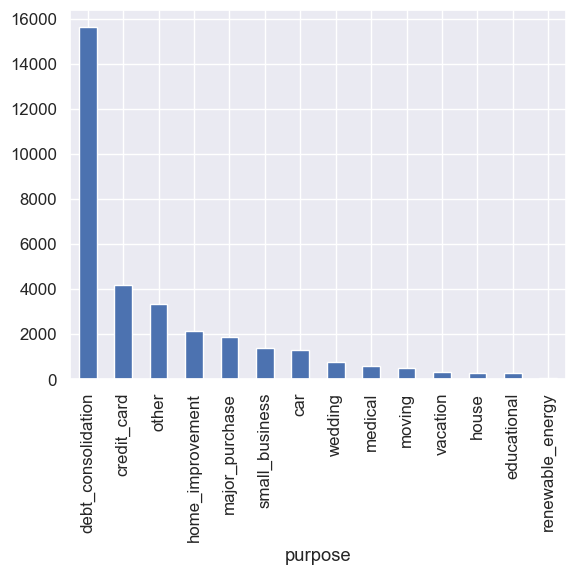

In [202]:
lending_df.purpose.value_counts().plot.bar();

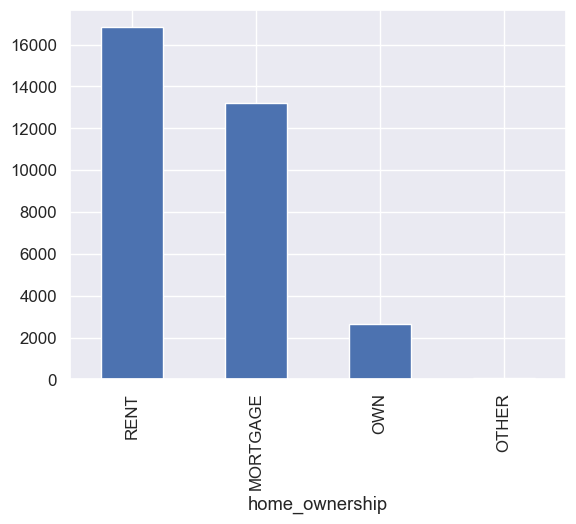

In [203]:
lending_df.home_ownership.value_counts().plot.bar();

## Ordered Categorical Variable Analysis

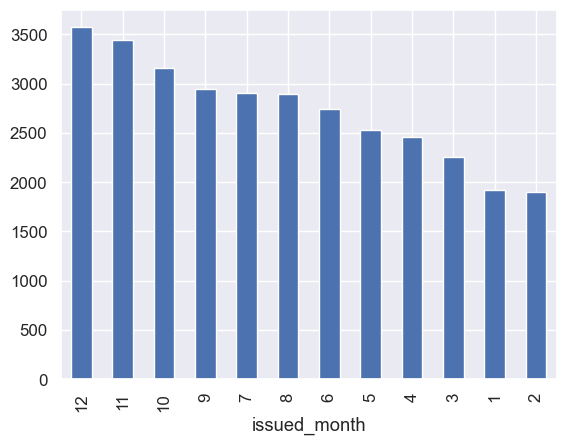

In [205]:
lending_df.issued_month.value_counts().plot.bar();

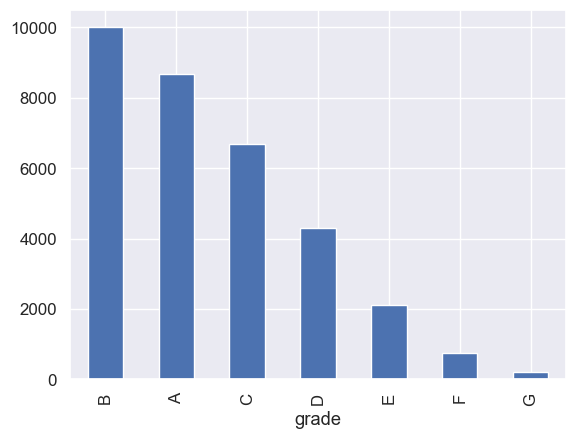

In [206]:
lending_df.grade.value_counts().plot.bar();

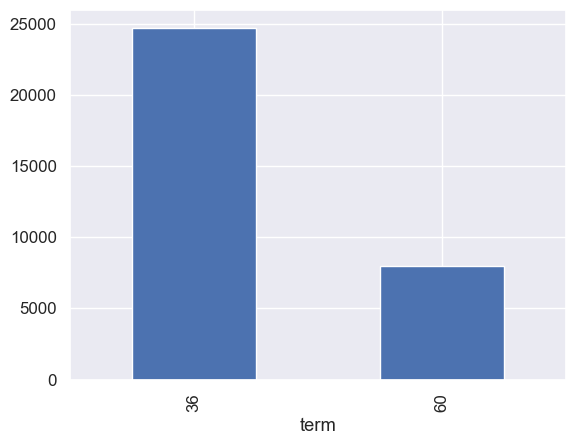

In [207]:
lending_df.term.value_counts().plot.bar();

## Quantitative Variable analysis

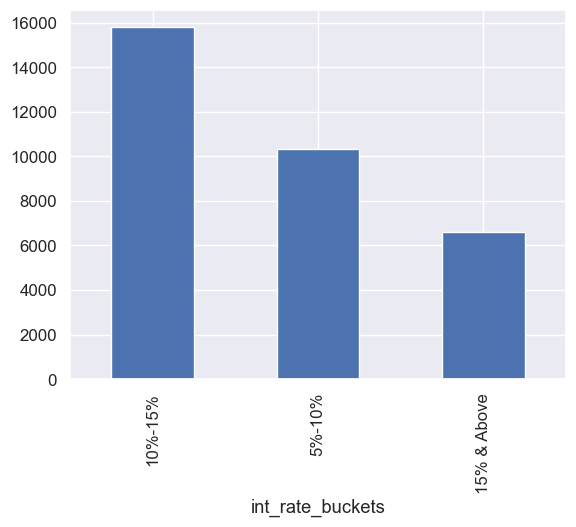

In [209]:
lending_df.int_rate_buckets.value_counts().plot.bar();

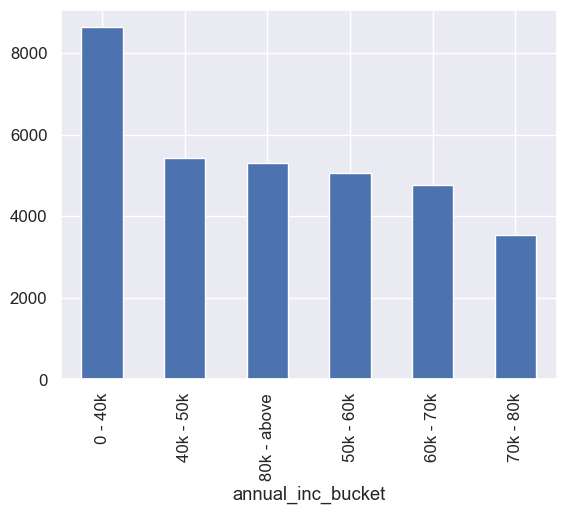

In [210]:
lending_df.annual_inc_bucket.value_counts().plot.bar();

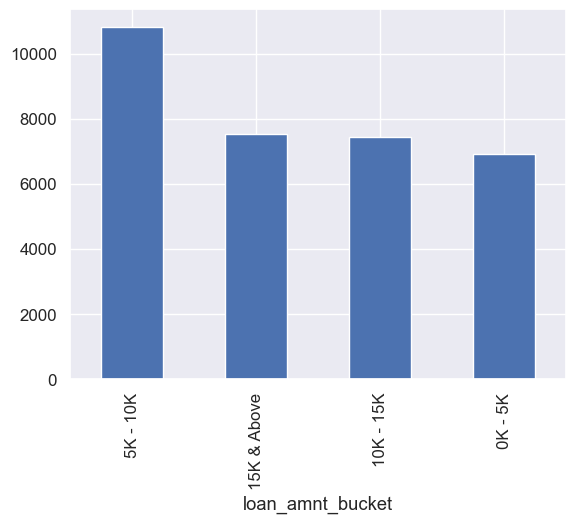

In [211]:
lending_df.loan_amnt_bucket.value_counts().plot.bar();

# Bivariate Analysis

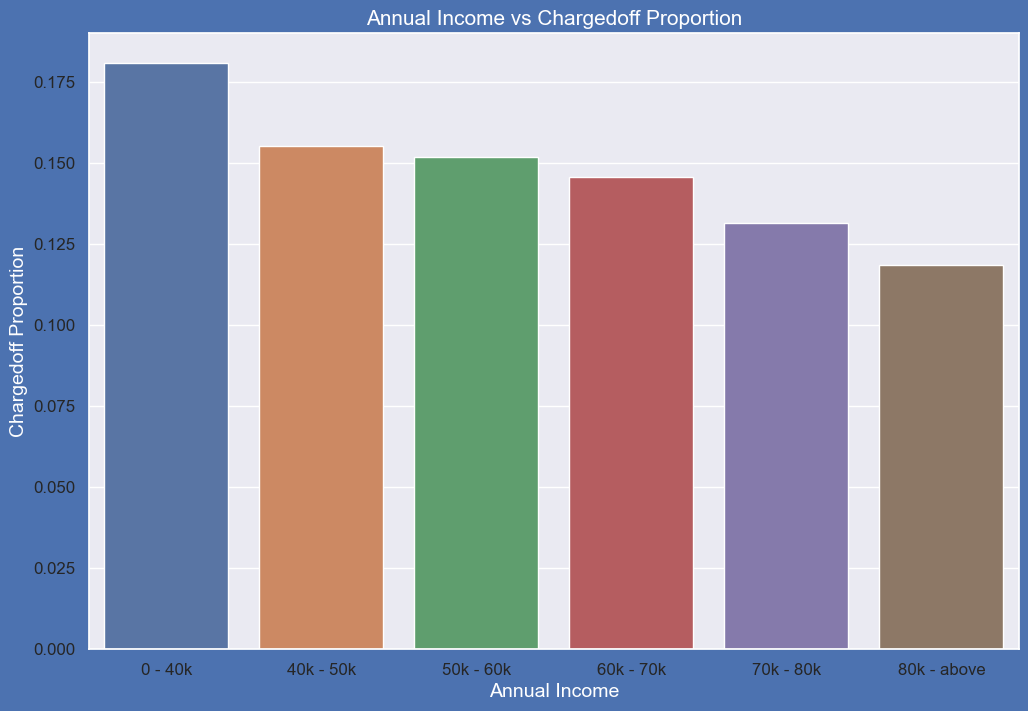

In [213]:
annual_inc_vs_charged_off = get_df_with_charged_off_proportion('annual_inc_bucket','loan_status')
perform_bivariate_analysis_using_barplot(annual_inc_vs_charged_off,'Annual Income vs Chargedoff Proportion','annual_inc_bucket','Annual Income')

In [214]:
# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased.

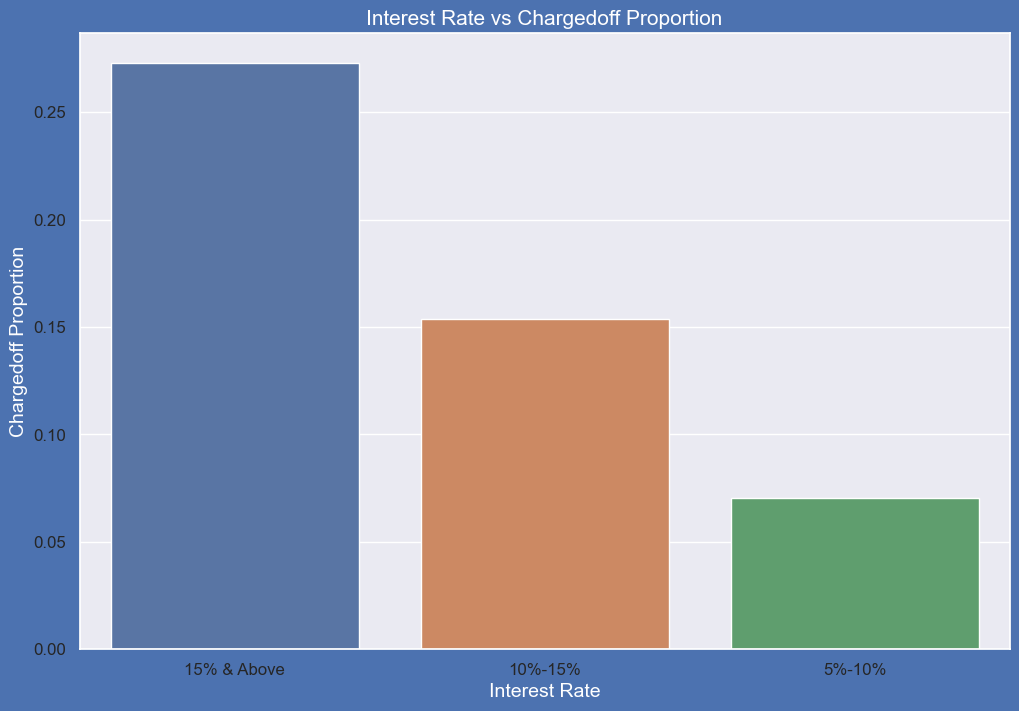

In [215]:
# Bivariate Analysis between int_rate vs charged off ratio
interese_rate_vs_charged_off = get_df_with_charged_off_proportion('int_rate_buckets','loan_status')
perform_bivariate_analysis_using_barplot(interese_rate_vs_charged_off,'Interest Rate vs Chargedoff Proportion','int_rate_buckets','Interest Rate')

In [216]:
# Observations:
# interest rate less than 10% or very low has very less chances of charged off. Intrest rates are starting from minimin 5 %.
# interest rate more than 16% or very high has good chnaces of charged off as compared to other category intrest rates.
# Charged off proportion is increasing with higher intrest rates.

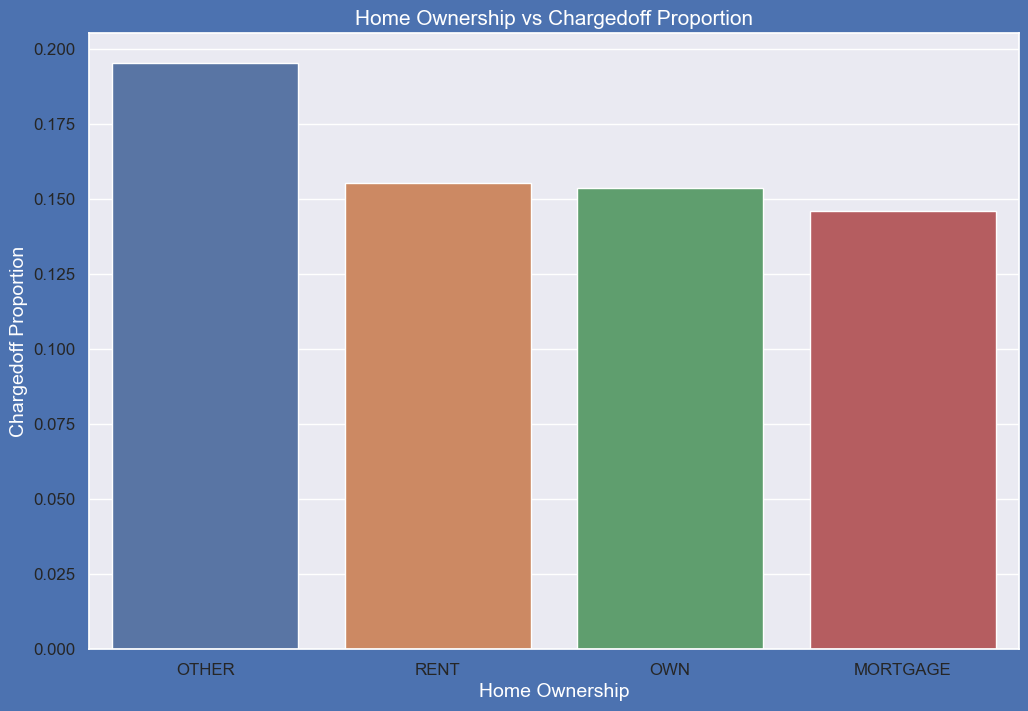

In [217]:
# Bivariate Analysis between home_ownership vs charged off ratio

home_ownseship_vs_charged_off = get_df_with_charged_off_proportion('home_ownership','loan_status')
perform_bivariate_analysis_using_barplot(home_ownseship_vs_charged_off,'Home Ownership vs Chargedoff Proportion','home_ownership','Home Ownership')

In [218]:
# Applicants who do not have own house are more likely to be defaulters

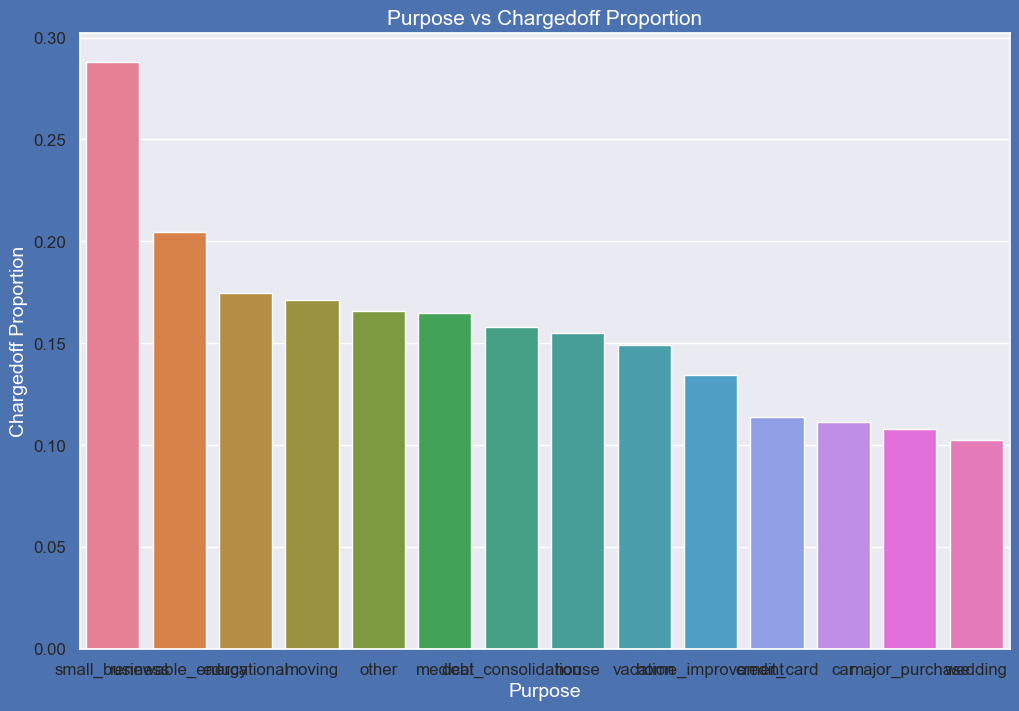

In [219]:
#Bivariate Analysis on Purpose of loan against Chargedoff_Proportion -

purpose_vs_charged_off = get_df_with_charged_off_proportion('purpose','loan_status')
perform_bivariate_analysis_using_barplot(purpose_vs_charged_off,'Purpose vs Chargedoff Proportion','purpose','Purpose')

In [220]:
#1. Those applicants who is having home loan is having low chances of loan defaults.
#2. Those applicants having loan for small bussiness is having high chances for loan defaults.

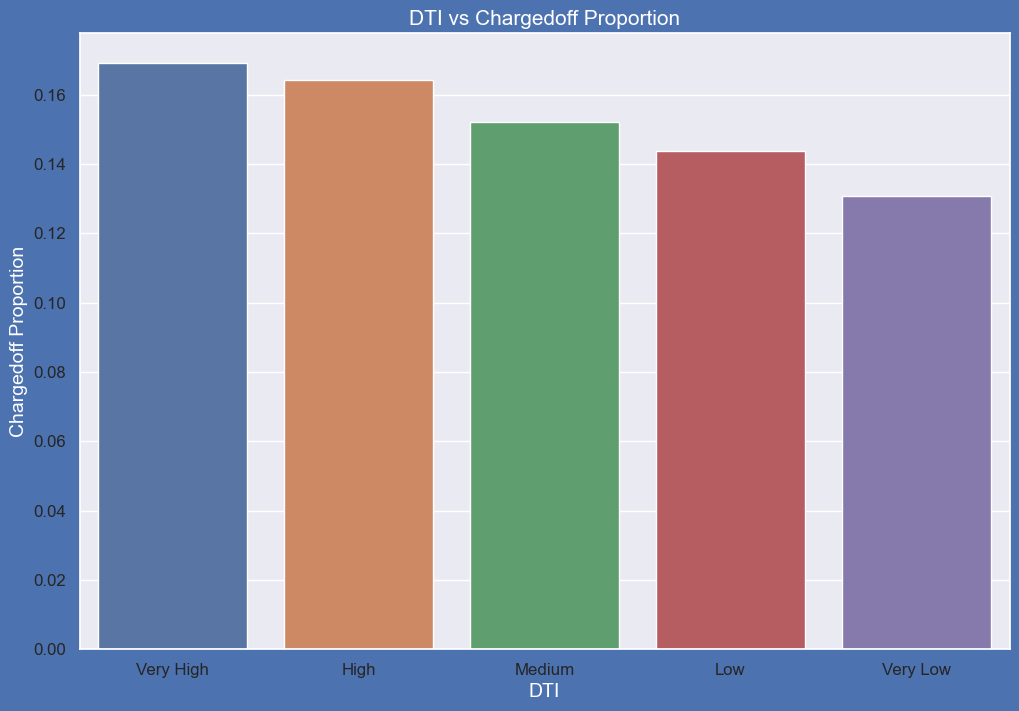

In [221]:
#Bivariate Analysis on DTI against Chargedoff_Proportion -
dti_vs_charged_off = get_df_with_charged_off_proportion('dti_bucket','loan_status')
perform_bivariate_analysis_using_barplot(dti_vs_charged_off,'DTI vs Chargedoff Proportion','dti_bucket','DTI')


In [222]:
# Observation:
#1.High DTI value  having high risk of defaults
# 2 Lower the DTI having low chances loan defaults.

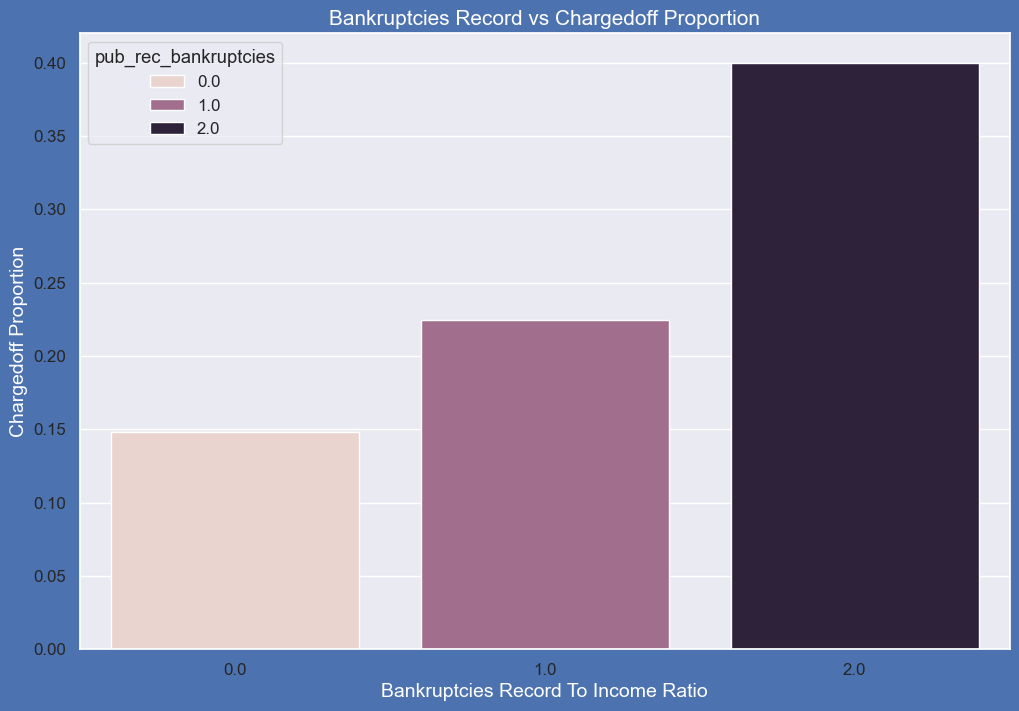

In [223]:
# #Bivariate Analysis on Bankruptcies Record against Chargedoff_Proportion -

pub_rec_bankruptcies_vs_charged_off = get_df_with_charged_off_proportion('pub_rec_bankruptcies','loan_status')
perform_bivariate_analysis_using_barplot(pub_rec_bankruptcies_vs_charged_off,'Bankruptcies Record vs Chargedoff Proportion','pub_rec_bankruptcies','Bankruptcies Record To Income Ratio')

In [224]:
# Observations:
#1.Bankruptcies Record with 2 is having high impact on loan defaults
# 2.Bankruptcies Record with 0 is low impact on loan defaults
# 3.Lower the Bankruptcies lower the risk.

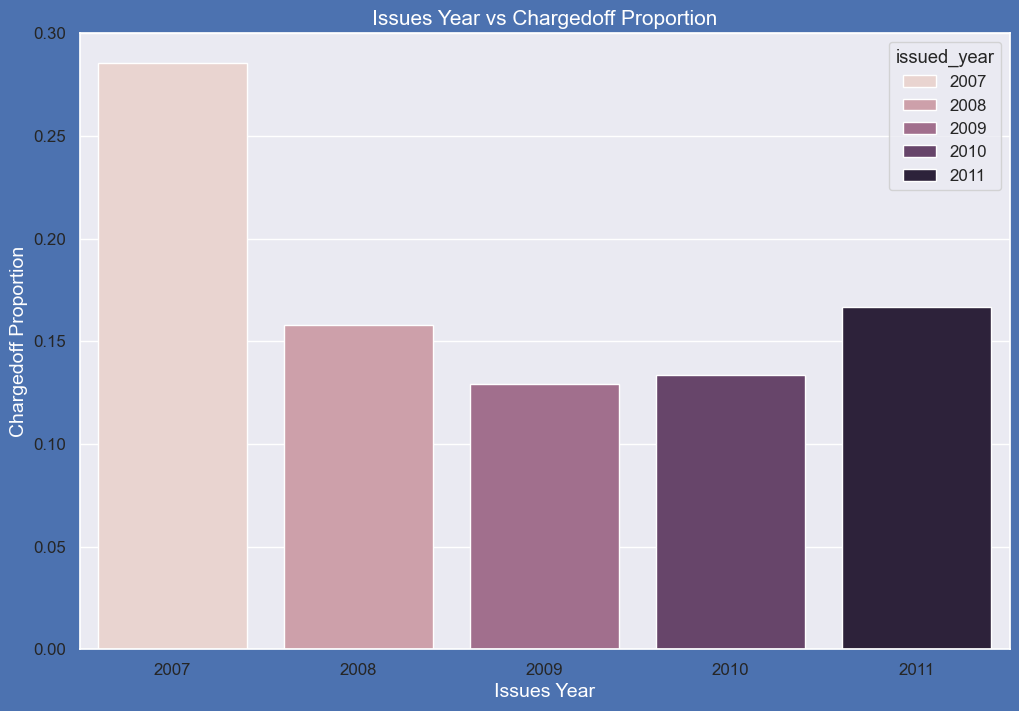

In [225]:
# #Bivariate Analysis on Issues of Year  against Chargedoff_Proportion -
issued_year_vs_charged_off = get_df_with_charged_off_proportion('issued_year','loan_status')
perform_bivariate_analysis_using_barplot(issued_year_vs_charged_off,'Issues Year vs Chargedoff Proportion','issued_year','Issues Year')

In [226]:
 # Year 2007 is highest loan defaults.
 # 2009 is having lowest loan defaults.

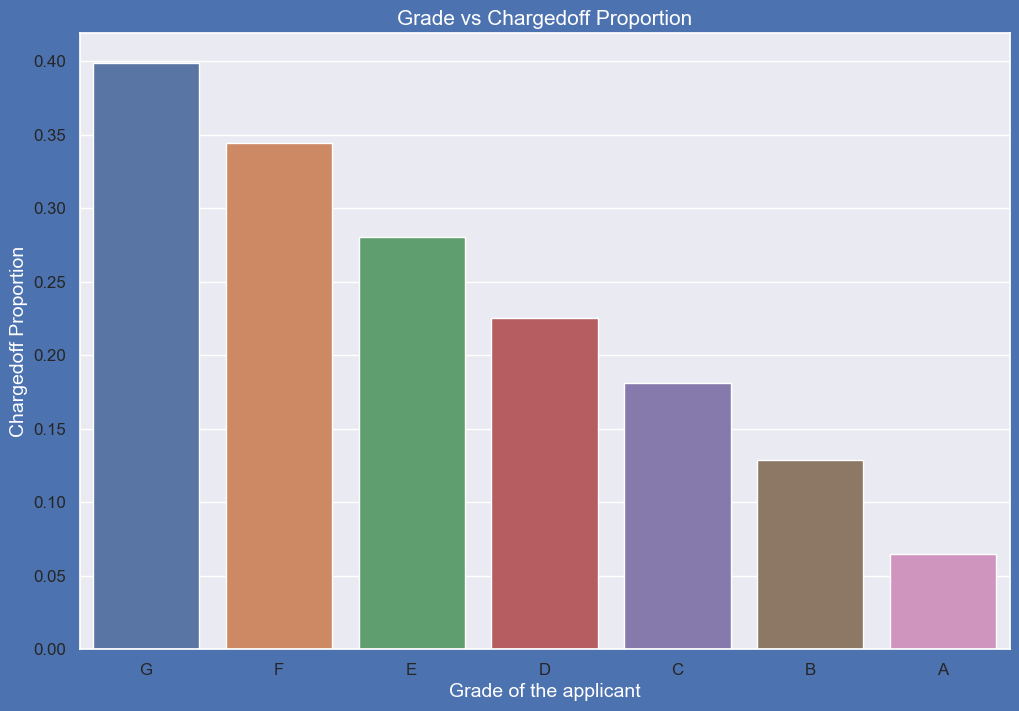

In [227]:
# #Bivariate Analysis on Grade against Chargedoff_Proportion -
grade_vs_charged_off = get_df_with_charged_off_proportion('grade','loan_status')
perform_bivariate_analysis_using_barplot(grade_vs_charged_off,'Grade vs Chargedoff Proportion','grade','Grade of the applicant')

In [228]:
  # observations :
    #1. The Loan applicants with loan Grade G is having higest Loan Defaults.
    #2. The Loan applicants with loan A is having lowest Loan Defaults.

# Correlation Analysis

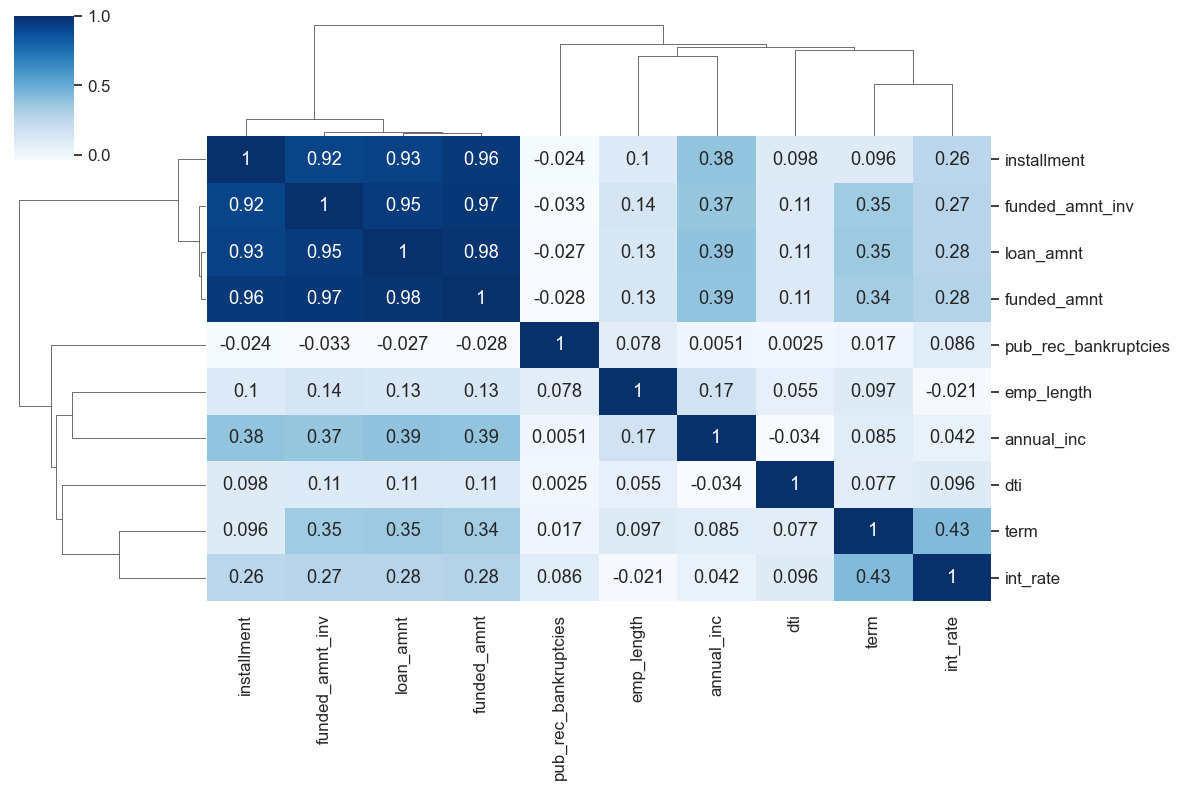

In [230]:
corr_df = lending_df
drop_columns = ['grade','sub_grade','home_ownership','verification_status','loan_status','purpose',
               'addr_state','loan_paid','loan_amnt_bucket','int_rate_buckets','annual_inc_bucket','dti_bucket','zip_code','issue_d', 'issued_month','issued_year']
corr_df = corr_df.drop(columns = drop_columns, axis=1);
corr = corr_df.corr()
sns.set(font_scale=1.1)
sns.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")
plt.show()
# corr_loan.info()


In [231]:
corr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32730 entries, 0 to 39680
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             32730 non-null  float64
 1   funded_amnt           32730 non-null  float64
 2   funded_amnt_inv       32730 non-null  float64
 3   term                  32730 non-null  int64  
 4   int_rate              32730 non-null  float64
 5   installment           32730 non-null  float64
 6   emp_length            32730 non-null  int64  
 7   annual_inc            32730 non-null  float64
 8   dti                   32730 non-null  float64
 9   pub_rec_bankruptcies  32730 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 2.7 MB


<Axes: xlabel='term', ylabel='loan_amnt'>

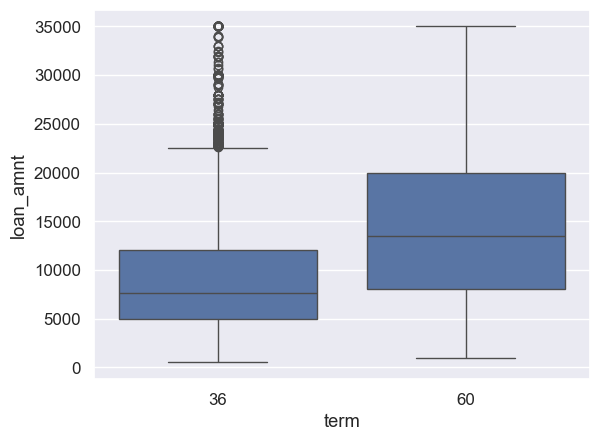

In [235]:
sns.boxplot(x = 'term', y = 'loan_amnt', data=corr_df)

<Axes: xlabel='term', ylabel='int_rate'>

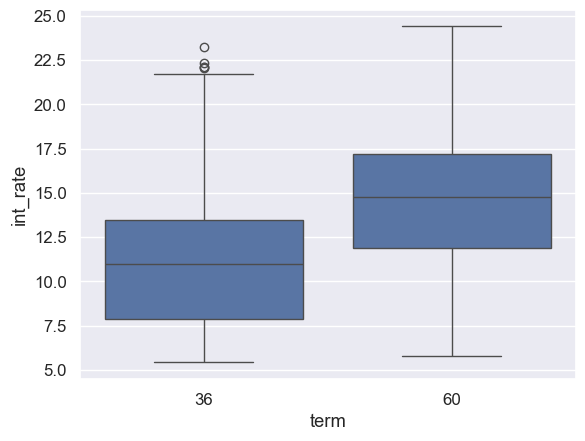

In [233]:
sns.boxplot(x = 'term', y = 'int_rate', data=corr_df)